In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import os

In [ ]:
# Put together all the files in our folder together
folder_path = r"/content/drive/MyDrive/CS_Finance_Data"

file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]

dataframes = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path, sep='^', header=0, engine='python', encoding='latin1', on_bad_lines='skip')
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()


,RSSD9001,RSSD9999,RSSD9007,RSSD9008,RSSD9132,RSSD9032,RSSD9146,BHBC3368,BHBC3402,BHBC3516,...,BHSPMZ36,BHSPNK60,BHCKLG24,BHCKLG25,BHCKLG26,BHCKLG27,BHCKLG28,BHCKLL57,BHCWKX78,BHCWKX83
0,1020180,20140331,20120101,20140930,551111,9,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1020201,20140331,20120101,20151230,551111,7,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1020676,20140331,20120101,20150905,551111,7,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1020902,20140331,20140331,20140727,551111,10,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1021628,20140331,20120101,20160504,551111,2,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
combined_df.shape

(101940, 2916)

In [ ]:
# We note here that the columns of our data from the files are different
# And so pandas does something tricky but its okay
# for i, df in enumerate(dataframes):
#     print(f"DataFrame {i + 1}: Shape = {df.shape}")

In [ ]:
selected_df = combined_df[['RSSD9001','RSSD9017', 'RSSD9999', 'BHCK4107', 'BHCK4073', 'BHCK4074', 'BHCK4079', 'BHCK4093', 'BHCK2170']]

selected_df.head()

,RSSD9001,RSSD9017,RSSD9999,BHCK4107,BHCK4073,BHCK4074,BHCK4079,BHCK4093,BHCK2170
0,1020180,BREMER FINANCIAL CORPORATION,20140331,77986.0,6030.0,71956.0,22857.0,65439.0,8915909.0
1,1020201,HSBC USA INC.,20140331,NaN,NaN,NaN,NaN,NaN,NaN
2,1020676,AMALGAMATED INVESTMENTS COMPANY,20140331,5635.0,331.0,5304.0,5344.0,8844.0,821108.0
3,1020902,"FIRST NATIONAL OF NEBRASKA, INC.",20140331,219765.0,12129.0,207636.0,90220.0,192443.0,16573510.0
4,1021628,BANAMEX USA BANCORP,20140331,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# rename the columns of selected df
selected_df.rename(columns={'RSSD9001': 'rssd_id', 'RSSD9017': 'bank_name',
                            'RSSD9999': 'year_qe', 'BHCK4107': "T_Int_Income",
                            'BHCK4073': "T_Int_Expense",
                            'BHCK4074': "N_Int_Income",
                            'BHCK4079': "T_Non-Int_Income",
                            'BHCK4093': "T_Non-Int_Expense",
                            'BHCK2170': "T_Assets"}, inplace=True)
selected_df.head()

,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets
0,1020180,BREMER FINANCIAL CORPORATION,20140331,77986.0,6030.0,71956.0,22857.0,65439.0,8915909.0
1,1020201,HSBC USA INC.,20140331,NaN,NaN,NaN,NaN,NaN,NaN
2,1020676,AMALGAMATED INVESTMENTS COMPANY,20140331,5635.0,331.0,5304.0,5344.0,8844.0,821108.0
3,1020902,"FIRST NATIONAL OF NEBRASKA, INC.",20140331,219765.0,12129.0,207636.0,90220.0,192443.0,16573510.0
4,1021628,BANAMEX USA BANCORP,20140331,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# select the top10 banks based on rssd_id
rssd_10_ls = [1039502, 1073757, 1951350, 1120754, 2380443, 2162966, 1119794, 1069778, 1074156, 3606542]
df = selected_df.set_index("rssd_id")
df10 = df.loc[rssd_10_ls]
df10.reset_index(inplace=True)
# df10.head()

In [ ]:
df10['year_qe'] = pd.to_datetime(df10['year_qe'], format = "%Y%m%d")
df10.head()

,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets
0,1039502,JPMORGAN CHASE & CO.,2014-03-31,12882000.0,2126000.0,10756000.0,12504000.0,14591000.0,2.476650e+09
1,1039502,JPMORGAN CHASE & CO.,2014-06-30,25834000.0,4189000.0,21645000.0,26402000.0,30119000.0,2.519995e+09
2,1039502,JPMORGAN CHASE & CO.,2014-09-30,38849000.0,6008000.0,32841000.0,39704000.0,45915000.0,2.526655e+09
3,1039502,JPMORGAN CHASE & CO.,2014-12-31,51889000.0,7897000.0,43992000.0,51394000.0,61341000.0,2.572773e+09
4,1039502,JPMORGAN CHASE & CO.,2015-03-31,12663000.0,1888000.0,10775000.0,13330000.0,14916000.0,2.577148e+09


In [ ]:
df10.isnull().sum()     # no nulls in the top 10 banks

rssd_id              0
bank_name            0
year_qe              0
T_Int_Income         0
T_Int_Expense        0
N_Int_Income         0
T_Non-Int_Income     0
T_Non-Int_Expense    0
T_Assets             0
dtype: int64

In [ ]:
df10.shape

(404, 9)

In [ ]:
# df10['PPNR'] = df10['T_Int_Income'] - df10['T_Int_Expense'] + df10["T_Non-Int_Income"] - df10['T_Non-Int_Income']
# df10.head()

In [ ]:
def quarterize(df, cols_to_process, dt_column):
  """
  Function to quarterizes the columns of a dataframe.
    df: has to be sorted by year and quarters
    cols_to_process: list of columns to quarterize
    dt_column: string
              column name of the date column

  """
  # indices is considered to be default
  fq_ids = df[(df[dt_column].dt.month == 3) & (df[dt_column].dt.day == 31)].index
  for col in cols_to_process:
    df[f"Q{col}"] = df[col].diff()
    df.loc[fq_ids, f"Q{col}"] = df.loc[fq_ids, col]
  return df

In [ ]:
ls_dfs = []
for bank in rssd_10_ls:
  df10_bank = df10[df10["rssd_id"] == bank].sort_values(by=['year_qe'])
  tmp_df = quarterize(df10_bank, ["T_Int_Income", "N_Int_Income", "T_Non-Int_Income", "T_Non-Int_Expense"], dt_column="year_qe")
  ls_dfs.append(tmp_df)

q_df = pd.concat(ls_dfs, ignore_index=True)
q_df.head()

,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets,QT_Int_Income,QN_Int_Income,QT_Non-Int_Income,QT_Non-Int_Expense
0,1039502,JPMORGAN CHASE & CO.,2014-03-31,12882000.0,2126000.0,10756000.0,12504000.0,14591000.0,2.476650e+09,12882000.0,10756000.0,12504000.0,14591000.0
1,1039502,JPMORGAN CHASE & CO.,2014-06-30,25834000.0,4189000.0,21645000.0,26402000.0,30119000.0,2.519995e+09,12952000.0,10889000.0,13898000.0,15528000.0
2,1039502,JPMORGAN CHASE & CO.,2014-09-30,38849000.0,6008000.0,32841000.0,39704000.0,45915000.0,2.526655e+09,13015000.0,11196000.0,13302000.0,15796000.0
3,1039502,JPMORGAN CHASE & CO.,2014-12-31,51889000.0,7897000.0,43992000.0,51394000.0,61341000.0,2.572773e+09,13040000.0,11151000.0,11690000.0,15426000.0
4,1039502,JPMORGAN CHASE & CO.,2015-03-31,12663000.0,1888000.0,10775000.0,13330000.0,14916000.0,2.577148e+09,12663000.0,10775000.0,13330000.0,14916000.0


In [ ]:
q_df.shape

(404, 13)

In [ ]:
q_df.isnull().sum()

rssd_id               0
bank_name             0
year_qe               0
T_Int_Income          0
T_Int_Expense         0
N_Int_Income          0
T_Non-Int_Income      0
T_Non-Int_Expense     0
T_Assets              0
QT_Int_Income         1
QN_Int_Income         1
QT_Non-Int_Income     1
QT_Non-Int_Expense    1
dtype: int64

In [ ]:
# select the row having QN_Int_Income value as null
q_df[q_df["QN_Int_Income"].isnull()]


,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets,QT_Int_Income,QN_Int_Income,QT_Non-Int_Income,QT_Non-Int_Expense
369,3606542,TD GROUP US HOLDINGS LLC,2015-09-30,4954262.0,308160.0,4646102.0,1275335.0,4380469.0,261164836.0,NaN,NaN,NaN,NaN


In [ ]:
q_df.iloc[368:371]

,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets,QT_Int_Income,QN_Int_Income,QT_Non-Int_Income,QT_Non-Int_Expense
368,1074156,TRUIST FINANCIAL CORPORATION,2024-03-31,6184000.0,2812000.0,3372000.0,1431000.0,2953000.0,534959000.0,6184000.0,3372000.0,1431000.0,2953000.0
369,3606542,TD GROUP US HOLDINGS LLC,2015-09-30,4954262.0,308160.0,4646102.0,1275335.0,4380469.0,261164836.0,NaN,NaN,NaN,NaN
370,3606542,TD GROUP US HOLDINGS LLC,2015-12-31,6743217.0,774800.0,5968417.0,1732865.0,5643719.0,267082561.0,1788955.0,1322315.0,457530.0,1263250.0


TD GROUP US HOLDINGS LLC has its first reporting to be in the *third* quarter of 2015.

We keep that value as its quaterly report value. No this does not help at all and it shows up weirdly in the quaterized normalized plot.

Since it is in the third quarter, I divide it by 3.

In [ ]:
q_df.loc[369, "QT_Int_Income"] = round(q_df.loc[369, "T_Int_Income"]/3, 1)
q_df.loc[369, "QN_Int_Income"] = round(q_df.loc[369, "N_Int_Income"]/3, 1)
q_df.loc[369, "QT_Non-Int_Income"] = round(q_df.loc[369, "T_Non-Int_Income"]/3, 1)
q_df.loc[369, "QT_Non-Int_Expense"] = round(q_df.loc[369, "T_Non-Int_Expense"]/3, 1)
q_df.loc[369,:]

rssd_id                                3606542
bank_name             TD GROUP US HOLDINGS LLC
year_qe                    2015-09-30 00:00:00
T_Int_Income                         4954262.0
T_Int_Expense                         308160.0
N_Int_Income                         4646102.0
T_Non-Int_Income                     1275335.0
T_Non-Int_Expense                    4380469.0
T_Assets                           261164836.0
QT_Int_Income                        1651420.7
QN_Int_Income                        1548700.7
QT_Non-Int_Income                     425111.7
QT_Non-Int_Expense                   1460156.3
Name: 369, dtype: object

In [ ]:
# We take the top 12 rows of q_df to see if our quarterization is doing what we want
q_df.iloc[0:13, [0, 1, 2, 3, -4]]

,rssd_id,bank_name,year_qe,T_Int_Income,QT_Int_Income
0,1039502,JPMORGAN CHASE & CO.,2014-03-31,12882000.0,12882000.0
1,1039502,JPMORGAN CHASE & CO.,2014-06-30,25834000.0,12952000.0
2,1039502,JPMORGAN CHASE & CO.,2014-09-30,38849000.0,13015000.0
3,1039502,JPMORGAN CHASE & CO.,2014-12-31,51889000.0,13040000.0
4,1039502,JPMORGAN CHASE & CO.,2015-03-31,12663000.0,12663000.0
5,1039502,JPMORGAN CHASE & CO.,2015-06-30,25279000.0,12616000.0
6,1039502,JPMORGAN CHASE & CO.,2015-09-30,38111000.0,12832000.0
7,1039502,JPMORGAN CHASE & CO.,2015-12-31,51361000.0,13250000.0
8,1039502,JPMORGAN CHASE & CO.,2016-03-31,13615000.0,13615000.0
9,1039502,JPMORGAN CHASE & CO.,2016-06-30,27480000.0,13865000.0


In [ ]:
q_df["bank_name"].unique()

array(['JPMORGAN CHASE & CO.', 'BANK OF AMERICA CORPORATION',
       'CITIGROUP INC.', 'WELLS FARGO & COMPANY',
       'GOLDMAN SACHS GROUP, INC., THE', 'MORGAN STANLEY', 'U.S. BANCORP',
       'PNC FINANCIAL SERVICES GROUP, INC., THE', 'BB&T CORPORATION',
       'TRUIST FINANCIAL CORPORATION', 'TD GROUP US HOLDINGS LLC'],
      dtype=object)

In [ ]:
q_df.set_index("rssd_id").loc[1074156]["bank_name"].unique()


array(['BB&T CORPORATION', 'TRUIST FINANCIAL CORPORATION'], dtype=object)

We observe the unique ID 1074156 has two separate bank names

In [ ]:
# Shorten the bank names for viz
bank_namings = {
    "JPMORGAN CHASE & CO.": "JPM CHASE",
    "BANK OF AMERICA CORPORATION": "BOA",
    "CITIGROUP INC.": "CITIGROUP",
    "WELLS FARGO & COMPANY": "WELLS FARGO",
    "GOLDMAN SACHS GROUP, INC., THE": "GOLDMAN SACHS",
    "MORGAN STANLEY": "MORGAN STANLEY",
    "U.S. BANCORP": "U.S. BANCORP",
    "PNC FINANCIAL SERVICES GROUP, INC., THE": "PNC",
    'BB&T CORPORATION' : "TRUIST",
    "TRUIST FINANCIAL CORPORATION" : "TRUIST",
    "TD GROUP US HOLDINGS LLC": "TD GROUP"
}

df_copy = q_df.copy()
df_copy["bank_name"] = df_copy["bank_name"].replace(bank_namings)
df_copy.head()



,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets,QT_Int_Income,QN_Int_Income,QT_Non-Int_Income,QT_Non-Int_Expense
0,1039502,JPM CHASE,2014-03-31,12882000.0,2126000.0,10756000.0,12504000.0,14591000.0,2.476650e+09,12882000.0,10756000.0,12504000.0,14591000.0
1,1039502,JPM CHASE,2014-06-30,25834000.0,4189000.0,21645000.0,26402000.0,30119000.0,2.519995e+09,12952000.0,10889000.0,13898000.0,15528000.0
2,1039502,JPM CHASE,2014-09-30,38849000.0,6008000.0,32841000.0,39704000.0,45915000.0,2.526655e+09,13015000.0,11196000.0,13302000.0,15796000.0
3,1039502,JPM CHASE,2014-12-31,51889000.0,7897000.0,43992000.0,51394000.0,61341000.0,2.572773e+09,13040000.0,11151000.0,11690000.0,15426000.0
4,1039502,JPM CHASE,2015-03-31,12663000.0,1888000.0,10775000.0,13330000.0,14916000.0,2.577148e+09,12663000.0,10775000.0,13330000.0,14916000.0


In [ ]:
len(df_copy)

404

In [ ]:
# df_copy["bank_name"].unique()

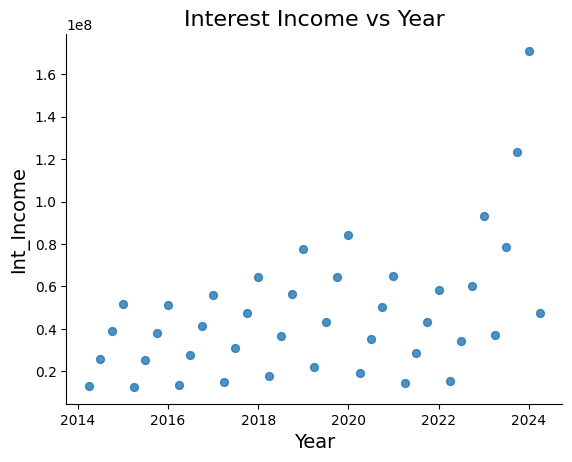

In [ ]:
# Before Quaterization
jpm = q_df[q_df["bank_name"] == "JPMORGAN CHASE & CO."]
jpm.plot(kind='scatter', x='year_qe', y='T_Int_Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Interest Income vs Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Int_Income', fontsize=14);


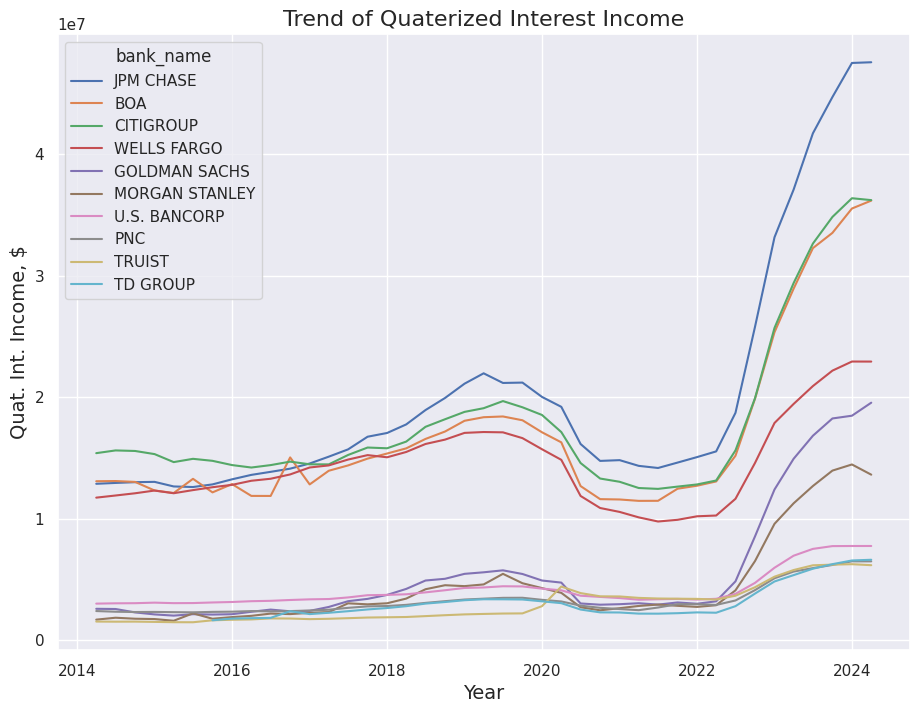

In [ ]:
# Trend of Quaterized Interest Income
sns.set_theme(rc={'figure.figsize':(11,8)})
sns.lineplot(data= df_copy, x='year_qe', y='QT_Int_Income', hue='bank_name');
plt.title('Trend of Quaterized Interest Income', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Quat. Int. Income, $', fontsize=14);

In [ ]:
# q_df.isnull().sum()

Normalization

In [ ]:
# normalizing quaterized Total Income by T. Assets
df_copy["QT_Int_Income"] = df_copy["QT_Int_Income"] / df_copy["T_Assets"]
df_copy["QN_Int_Income"] = df_copy["QN_Int_Income"] / df_copy["T_Assets"]
df_copy.head()


,rssd_id,bank_name,year_qe,T_Int_Income,T_Int_Expense,N_Int_Income,T_Non-Int_Income,T_Non-Int_Expense,T_Assets,QT_Int_Income,QN_Int_Income,QT_Non-Int_Income,QT_Non-Int_Expense
0,1039502,JPM CHASE,2014-03-31,12882000.0,2126000.0,10756000.0,12504000.0,14591000.0,2.476650e+09,0.005201,0.004343,12504000.0,14591000.0
1,1039502,JPM CHASE,2014-06-30,25834000.0,4189000.0,21645000.0,26402000.0,30119000.0,2.519995e+09,0.005140,0.004321,13898000.0,15528000.0
2,1039502,JPM CHASE,2014-09-30,38849000.0,6008000.0,32841000.0,39704000.0,45915000.0,2.526655e+09,0.005151,0.004431,13302000.0,15796000.0
3,1039502,JPM CHASE,2014-12-31,51889000.0,7897000.0,43992000.0,51394000.0,61341000.0,2.572773e+09,0.005068,0.004334,11690000.0,15426000.0
4,1039502,JPM CHASE,2015-03-31,12663000.0,1888000.0,10775000.0,13330000.0,14916000.0,2.577148e+09,0.004914,0.004181,13330000.0,14916000.0


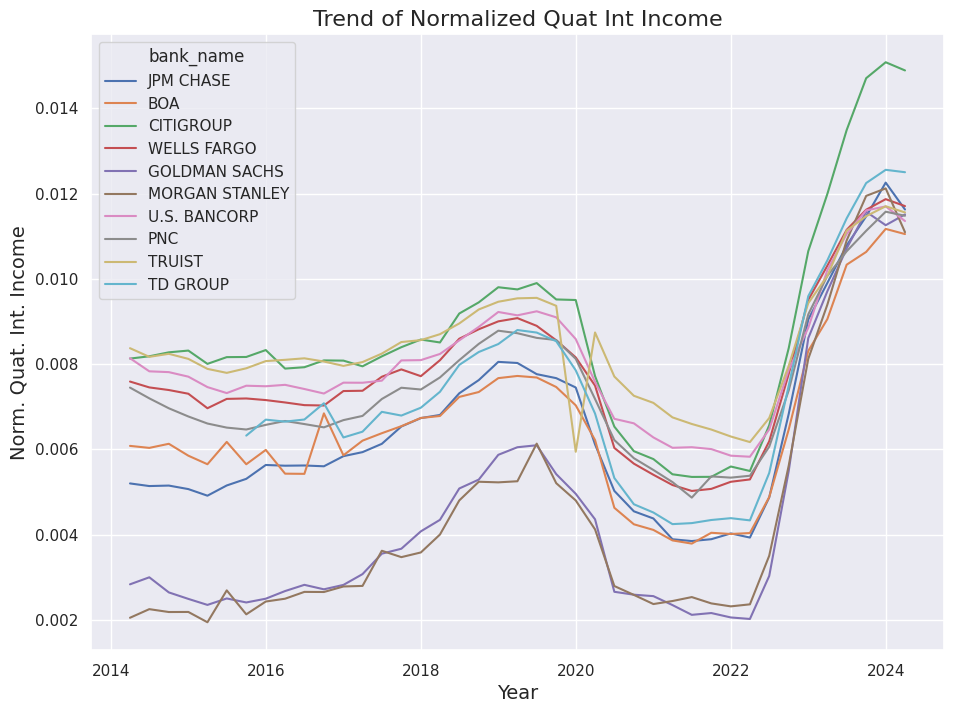

In [ ]:
# Trend of Normalized Quaterized Interest Income
sns.set_theme(rc={'figure.figsize':(11,8)})
sns.lineplot(data= df_copy, x='year_qe', y='QT_Int_Income', hue='bank_name');
plt.title('Trend of Normalized Quat Int Income', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Norm. Quat. Int. Income', fontsize=14);

### We bring in our Data some Macro Economic Variables

In [ ]:
uner_df = pd.read_csv("/content/drive/MyDrive/CS_Finance_Data/MacroEconomic_Variables/UNRATE.csv")
gdp_df = pd.read_csv("/content/drive/MyDrive/CS_Finance_Data/MacroEconomic_Variables/GDP.csv")
gdp_df.head()



,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [ ]:
gdp_df.shape

(309, 2)

In [ ]:
# select from gdp_df rows with whose date is after 2013
gdp_df = gdp_df[gdp_df["DATE"] >= "2014-01-01"]
gdp_df.head()

,DATE,GDP
268,2014-01-01,17197.738
269,2014-04-01,17518.508
270,2014-07-01,17804.228
271,2014-10-01,17912.079
272,2015-01-01,18063.529


We observe the that the gdp is reported at the beginning of each quarter where as banks ppnr is reported at the end of the quarter.
It should not be a problem though :

In [ ]:
# Normalizing each banks Income using T_Assets


In [ ]:
# Add macro-economic data

In [ ]:
# To do list. Forecast the future ppnr
#

KeyError: 'RSSD9017'

In [ ]:

# Create the first DataFrame
df1 = pd.DataFrame({
    'Age': [25, 30, 35],
    'Height': [175, 180, 165]
})

# Create the second DataFrame
df2 = pd.DataFrame({
    'Height': [192, 167, 132],
    'Weight': [70, 80, 60]
})

print("DataFrame 1:")
print(df1)
print("\nDataFrame 2:")
print(df2)

# Put the DataFrames into a list
df_list = [df1, df2]

# Concatenate the DataFrames
result = pd.concat(df_list)

print("\nConcatenated DataFrame:")
print(result)